In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk




In [2]:

sent_review = pd.read_csv('imdb_dataset.csv')


In [3]:
sent_review

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


### Data Exploration and cleaning

In [4]:
# explore the data type

sent_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


- I have just two columns and they are ll object data types

In [5]:
# check for duplication in my dataset

sent_review.duplicated().sum()

418

- This showed that aI have 418 duplication in my dataset

In [6]:
# removing the duplication

sent_review.drop_duplicates(keep ='first', inplace = True)

In [7]:
# carry out sanity checks
sent_review.duplicated().sum()

0

In [8]:
# reseting the index of my dataset
sent_review.reset_index(drop = True, inplace = True)

- The duplicates have been removed

In [9]:
sent_review['sentiment'].isna().sum()

0

In [10]:
sent_review['sentiment'] = sent_review['sentiment'].replace({'negative': 0, 'positive': 1})


In [11]:
sent_review['sentiment'] 

0        1
1        1
2        1
3        0
4        1
        ..
49577    1
49578    0
49579    0
49580    0
49581    0
Name: sentiment, Length: 49582, dtype: int64

## Exploratory Data Analysis

In [11]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def wordcloud_create(sent_review, sentvalue):
    reviews = sent_review[sent_review['sentiment'] == sentvalue]
    words = ' '.join(reviews['review'])  # Use 'reviews' instead of 'sent_review'

    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='black',
                          width=2995,
                          height=2510).generate(words)

    plt.figure(1, figsize=(13, 13))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


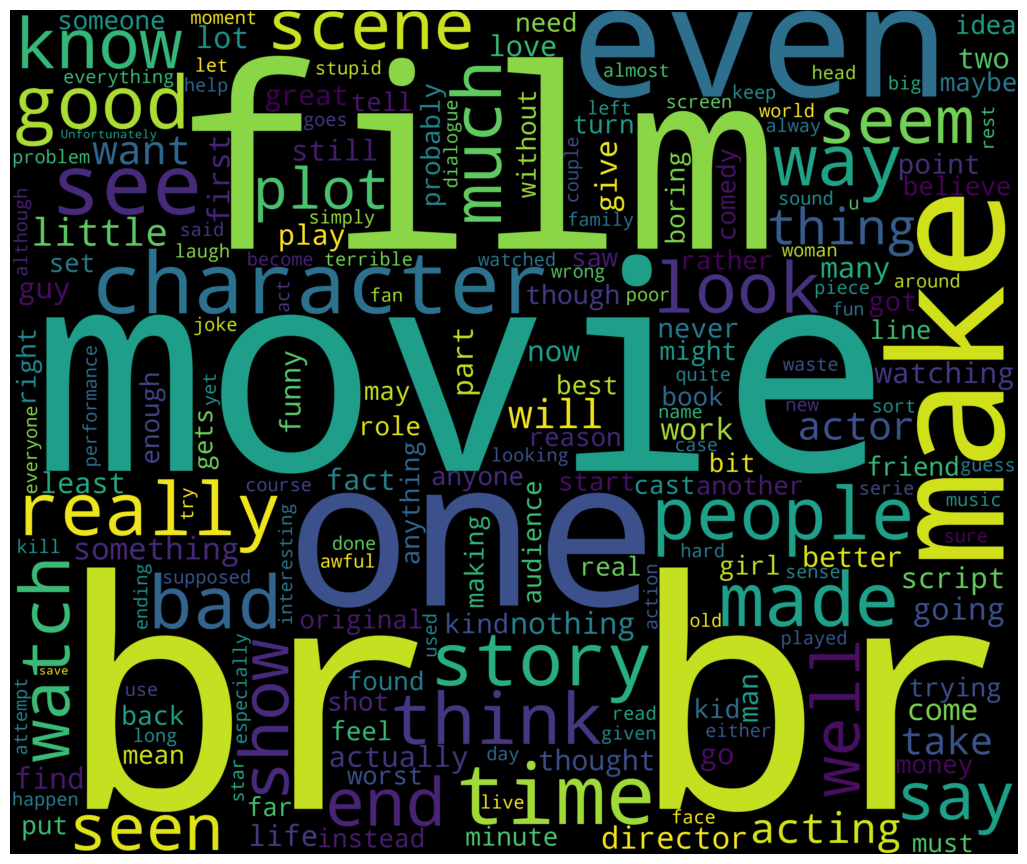

In [12]:
#show the negative reviews
wordcloud_create(sent_review, 0)

 - boring, least, kill,even, still,nothing, enough, bad, terrible, little, stupid,  instead, used, wrong, old are some of the important recurring that appears as negative reviews
- good, better, beautifu, enjoy, give, love, funny, laugh, life, believe, family, real, great, feel, much, best are some of the important words observed to be positives reviews

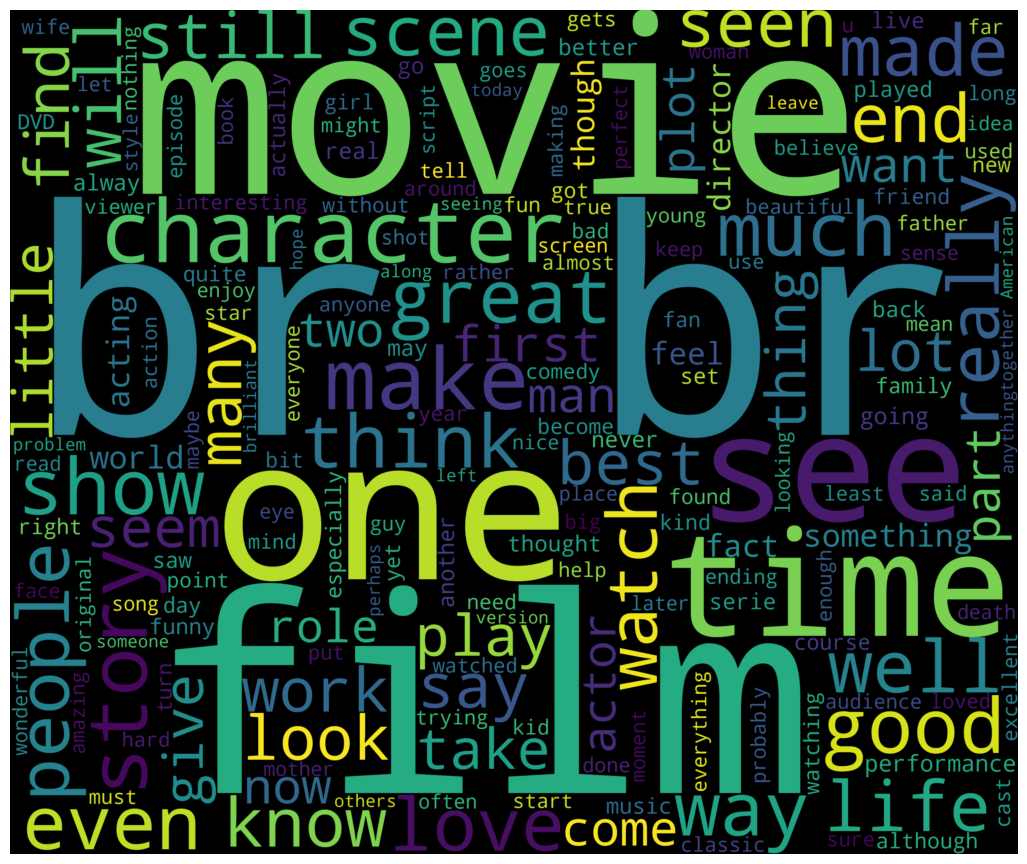

In [13]:
#show the positive reviews
wordcloud_create(sent_review, 1)

- good, better, beautifu, enjoy, give, love, funny, laugh, life, believe, family, real, great, feel, much, best are some of the important words observed to be positives reviews

In [14]:
# check the labels of my dataframe
sent_review['sentiment'].value_counts()

1    24884
0    24698
Name: sentiment, dtype: int64

In [15]:
# plotting the distribution of of the labelled class

def plot_bar(sent_review, feature):
    plot = sns.countplot(x=feature, data=sent_review)

    # calculating the length of the total data
    total_data = len(sent_review)

    # Display the percentage on top of each bar
    for p in plot.patches:
        height = p.get_height()
        plot.text(p.get_x() + p.get_width() / 2., height + 3, f'{height / total_data:.2%}', ha="center")





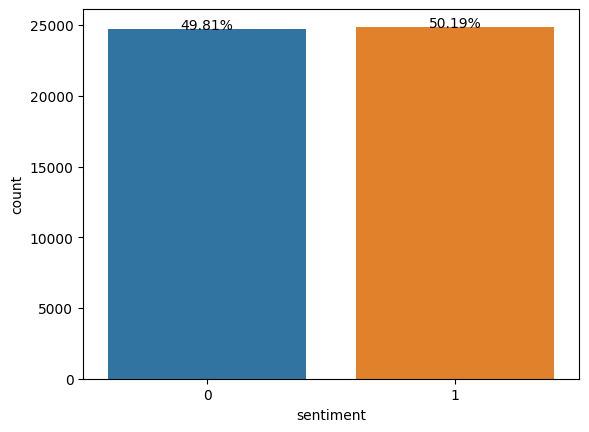

In [16]:
plot_bar(sent_review, 'sentiment')

- The data seems to be balanced. I will go ahed with other processes like data preprocessing and eventually build the model

### Data Pre-processing

#### HTML Tags Removal

In [17]:
from bs4 import BeautifulSoup

def remove_html_tags(html_text):
    soup = BeautifulSoup(html_text, 'html.parser')
    text = soup.get_text()
    return text

sent_review['review'] = sent_review['review'].apply(lambda x: remove_html_tags(x))


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [18]:
sent_review.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. The filming tec...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


- The html tags have been removed

#### Fix Contractions

In [19]:

import contractions

# Define a function to apply the contraction fix
def fix_contractions(text):
    return contractions.fix(text)

# Apply the contraction fix to the 'review' column
sent_review['review'] = sent_review['review'].apply(fix_contractions)


In [20]:
sent_review.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. The filming tec...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there is a family where a little boy...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


### Tokenization

In [21]:
sent_review['review'] = sent_review.apply(lambda row: nltk.word_tokenize(row['review']), axis = 1)

In [22]:
sent_review.head(2)

,review,sentiment
0,"[One, of, the, other, reviewers, has, mentione...",1
1,"[A, wonderful, little, production, ., The, fil...",1


### Remove the digits

In [23]:
def digit_remove(row):
    tokens = [word for word in row if not word.isdigit()]
    return tokens
sent_review['review'] = sent_review['review'].apply(lambda x: digit_remove(x))


In [24]:
sent_review.head()

,review,sentiment
0,"[One, of, the, other, reviewers, has, mentione...",1
1,"[A, wonderful, little, production, ., The, fil...",1
2,"[I, thought, this, was, a, wonderful, way, to,...",1
3,"[Basically, there, is, a, family, where, a, li...",0
4,"[Petter, Mattei, 's, ``, Love, in, the, Time, ...",1


### Remove Non-Ascii character

In [25]:
import unicodedata
def non_ascii_removal(row):
    row_new = []
    for word in row:
        word_new = unicodedata.normalize('NFKD', word).encode('ascii','ignore').decode('utf-8', 'ignore')
        row_new.append(word_new)
    return row_new
sent_review['review'] = sent_review['review'].apply(lambda x: non_ascii_removal(x))
sent_review.head()

,review,sentiment
0,"[One, of, the, other, reviewers, has, mentione...",1
1,"[A, wonderful, little, production, ., The, fil...",1
2,"[I, thought, this, was, a, wonderful, way, to,...",1
3,"[Basically, there, is, a, family, where, a, li...",0
4,"[Petter, Mattei, 's, ``, Love, in, the, Time, ...",1


### Remove Punctuation

In [26]:
import string
def removeRuntuaction(row):
    tokens = [word for word in row if word not in string.punctuation]
    return tokens
sent_review['review'] = sent_review['review'].apply(lambda x: removeRuntuaction (x))


In [27]:
sent_review.head()


,review,sentiment
0,"[One, of, the, other, reviewers, has, mentione...",1
1,"[A, wonderful, little, production, The, filmin...",1
2,"[I, thought, this, was, a, wonderful, way, to,...",1
3,"[Basically, there, is, a, family, where, a, li...",0
4,"[Petter, Mattei, 's, ``, Love, in, the, Time, ...",1


- Some characters like  `` were also noticed
- To clean this up, we have to use regular expression

### Lower case My Data

In [28]:
def lowercase(row):
    words_rows = [word.lower()for word in row]
    return words_rows
sent_review['review'] = sent_review['review'].apply(lambda x: lowercase (x))

In [29]:
sent_review.head()

,review,sentiment
0,"[one, of, the, other, reviewers, has, mentione...",1
1,"[a, wonderful, little, production, the, filmin...",1
2,"[i, thought, this, was, a, wonderful, way, to,...",1
3,"[basically, there, is, a, family, where, a, li...",0
4,"[petter, mattei, 's, ``, love, in, the, time, ...",1


- Some of the characters still appears. I will still handle that maybe using regex

### Remove Stopwords

In [30]:
from nltk.corpus import stopwords

words_stop = stopwords.words('english')

def removestopwords(row):
    words = [word for word in row if word not in words_stop]
    return words
sent_review['review'] = sent_review['review'].apply(lambda x: removestopwords(x))

In [31]:
sent_review.head()

,review,sentiment
0,"[one, reviewers, mentioned, watching, oz, epis...",1
1,"[wonderful, little, production, filming, techn...",1
2,"[thought, wonderful, way, spend, time, hot, su...",1
3,"[basically, family, little, boy, jake, thinks,...",0
4,"[petter, mattei, 's, ``, love, time, money, ''...",1


#### Lematization

In [32]:
from nltk.stem import PorterStemmer, WordNetLemmatizer

lem = WordNetLemmatizer()

def words_lemmatize(row):
    words = [lem.lemmatize(word) for word in row]
    return words
sent_review['review'] = sent_review['review'].apply(lambda x: words_lemmatize(x))

In [33]:
sent_review.head(2)

,review,sentiment
0,"[one, reviewer, mentioned, watching, oz, episo...",1
1,"[wonderful, little, production, filming, techn...",1


### Apply Regular expression to remove special character

In [34]:
import re

def word_join(row):
    words = ' '.join([word for word in row])
    words = re.sub('[^a-zA-Z]', ' ', words)  # Changed '2' to 'Z' in the regex pattern
    return words  # Return the modified 'words' variable

sent_review['review'] = sent_review['review'].apply(lambda x: word_join(x))


In [35]:
sent_review.head(5)

,review,sentiment
0,one reviewer mentioned watching oz episode hoo...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically family little boy jake think zombie ...,0
4,petter mattei s love time money visuall...,1


- I now have a cleaned data. The next is to proceed with building my first model

### Sentiment Analysis Using Supervisd Learning

#### Applying Bag of words

In [36]:
# vectorization (text conversion to numbers)
from sklearn.feature_extraction.text import CountVectorizer

# Keep only 500 words
vec_count = CountVectorizer(max_features=500)

result_data = vec_count.fit_transform(sent_review['review'])

#feature conversion to arrays

result_data = result_data.toarray()

In [37]:
#check the shape of the feature vector
print(result_data.shape)

(49582, 500)


#### Feature selection

In [38]:
#feature selection
x = result_data
y = sent_review['sentiment']

In [39]:
# data spliting into training and testing

from sklearn.model_selection import train_test_split

#split the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0, stratify = y)

### Implemnet Randorm Forest Model on Bag of words

#### Training my Base Model and calcualting the accuracy on test data

In [40]:
#import the library
from sklearn.ensemble import RandomForestClassifier

rand_f = RandomForestClassifier(random_state = 0, n_jobs = -1)

#train the model

rand_f.fit(x_train, y_train)


RandomForestClassifier(n_jobs=-1, random_state=0)

### Calculate my classification report and evaluation metrics

In [41]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def score_metrics(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(9, 7))
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()




              precision    recall  f1-score   support

           0       0.81      0.79      0.80      7410
           1       0.80      0.81      0.81      7465

    accuracy                           0.80     14875
   macro avg       0.80      0.80      0.80     14875
weighted avg       0.80      0.80      0.80     14875



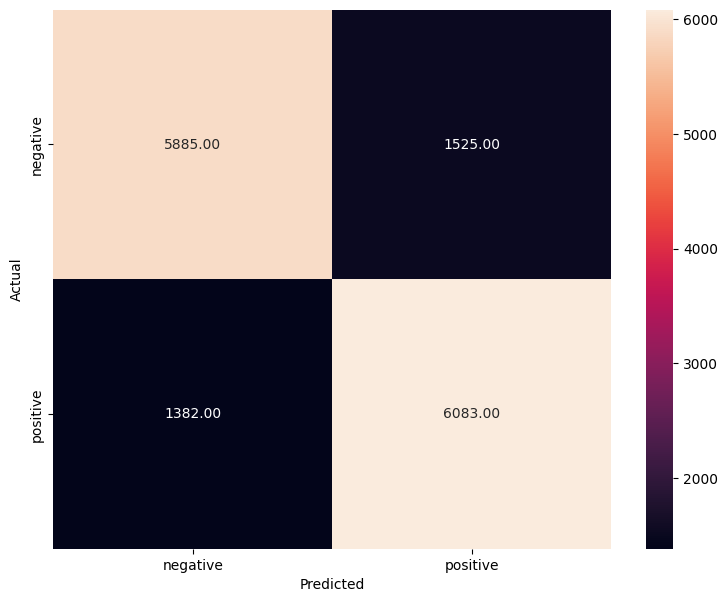

In [42]:
# make prediction

y_pred = rand_f.predict(x_test)

#check the metrics

score_metrics(y_test, y_pred)

### This is my baseline Model

#### Showing the top feature importance used by randomforest to make the prediction

In [43]:
vec_count.get_feature_names_out()

array(['able', 'absolutely', 'across', 'act', 'acting', 'action', 'actor',
       'actress', 'actually', 'add', 'age', 'ago', 'all', 'almost',
       'alone', 'along', 'already', 'also', 'although', 'always',
       'amazing', 'american', 'and', 'another', 'anyone', 'anything',
       'anyway', 'around', 'art', 'attempt', 'audience', 'away', 'awful',
       'back', 'bad', 'based', 'beautiful', 'become', 'becomes', 'begin',
       'beginning', 'behind', 'believe', 'best', 'better', 'big', 'bit',
       'black', 'blood', 'body', 'book', 'boring', 'boy', 'brilliant',
       'brother', 'budget', 'call', 'called', 'came', 'camera', 'car',
       'care', 'career', 'case', 'cast', 'certainly', 'chance', 'change',
       'character', 'child', 'cinema', 'city', 'classic', 'close', 'come',
       'comedy', 'coming', 'comment', 'complete', 'completely', 'cool',
       'cop', 'could', 'country', 'couple', 'course', 'crap', 'credit',
       'cut', 'dark', 'daughter', 'david', 'day', 'dead', 'deal',

#### instantiate the feature from the vectorizer

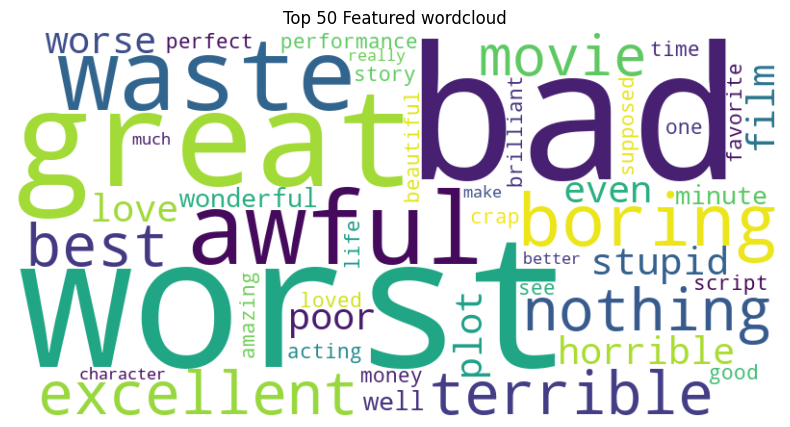

In [44]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def get_top50_words(model, all_features):
    topfeature = ''
    feat = model.feature_importances_
    feature = sorted(range(len(feat)), key=lambda k: feat[k], reverse=True)[:50]
    for i in feature:
        topfeature += all_features[i]
        topfeature += ' '
    
    wordcloud = WordCloud(background_color='white', colormap='viridis', width=800, height=400).generate(topfeature)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Top 50 Featured wordcloud')
    plt.axis('off')
    plt.show()

# Call the function with the appropriate parameters
features = vec_count.get_feature_names_out()
get_top50_words(rand_f, features)


- Positive words observed are great, best, better, excellent, good, amazing,love, perfect,loved, brillant, wonderful, beautiful, life, favorite
- Negative words observed are worse, waste, bad, awful,horrible, even, plot, boring,poor, crap

## Plot with Barchat for better visualization

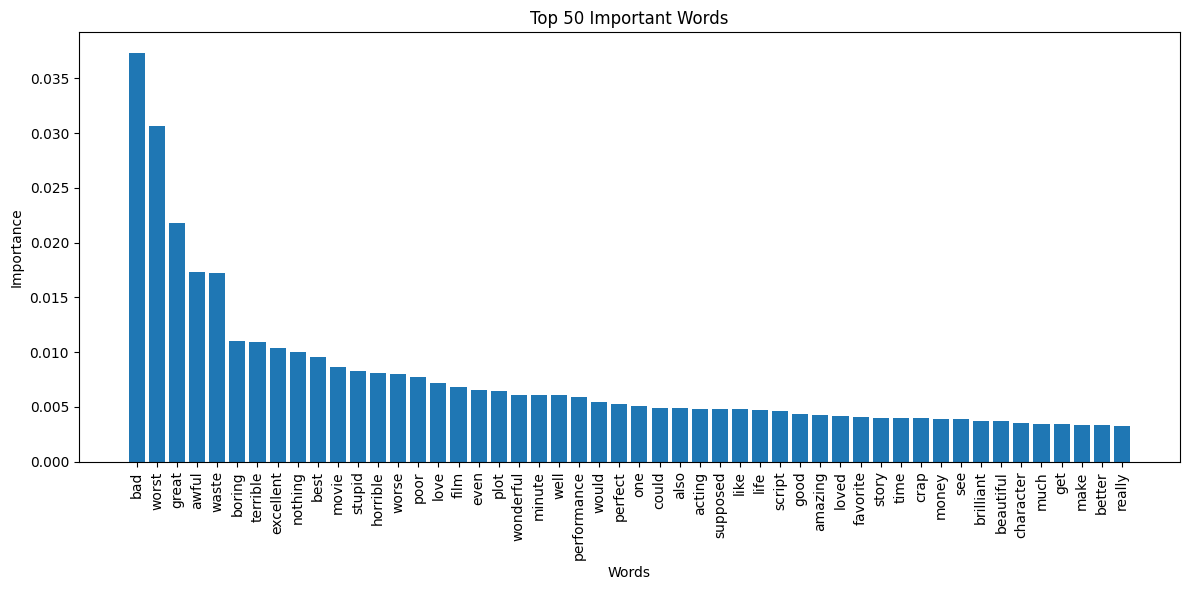

In [45]:
import matplotlib.pyplot as plt

def get_top50_words(model, all_features):
    feat_importance = model.feature_importances_
    sorted_idx = feat_importance.argsort()[::-1]
    
    top_features = [all_features[idx] for idx in sorted_idx[:50]]
    top_importances = feat_importance[sorted_idx][:50]

    return top_features, top_importances

features = vec_count.get_feature_names_out()
top_features, top_importances = get_top50_words(rand_f, features)

plt.figure(figsize=(12, 6))
plt.bar(top_features, top_importances)
plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('Importance')
plt.title('Top 50 Important Words')
plt.tight_layout()
plt.show()


### That marks the first model, the visualization, classification and the confusiion matrix

### TF-IDF

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

# create an instance of TF-IDF vectorizer
vec_tfidf = TfidfVectorizer(max_features=500)

# transforming the text with TF-IDF
vec_tfidf_features = vec_tfidf.fit_transform(sent_review['review'])


In [47]:
## To get the shape
vec_tfidf_features = vec_tfidf_features.toarray()


In [48]:
#feature selection

tfidf_x = vec_tfidf_features
y = sent_review['sentiment']

In [49]:
#split the data
x_train_tfidf, x_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_x,y, test_size = 0.2, random_state = 0)

In [50]:
#create instance of the model TF-IDF Model

tfidf_rf = RandomForestClassifier(random_state = 0, n_jobs= -1)

# train the model
tfidf_rf.fit(x_train_tfidf,y_train_tfidf)

RandomForestClassifier(n_jobs=-1, random_state=0)

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      4909
           1       0.81      0.83      0.82      5008

    accuracy                           0.81      9917
   macro avg       0.81      0.81      0.81      9917
weighted avg       0.81      0.81      0.81      9917



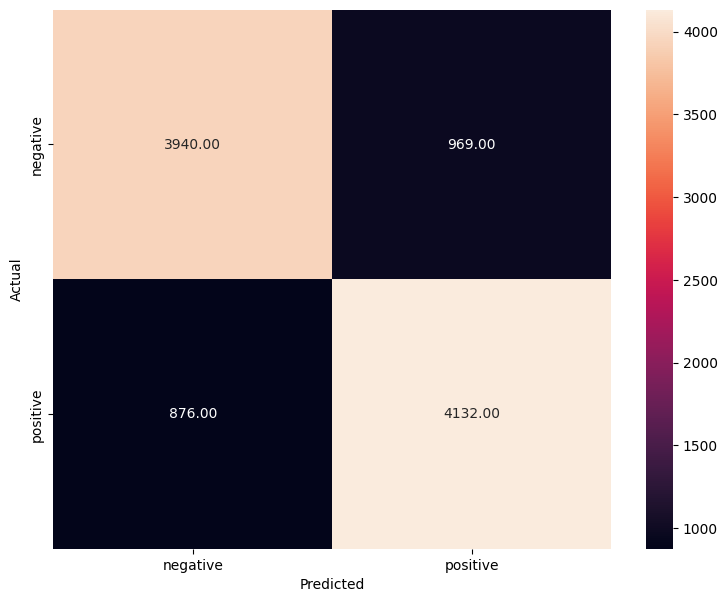

In [51]:
#make prediction
y_pred_tfidf = tfidf_rf.predict(x_test_tfidf)

#evaluation metrics

score_metrics(y_test_tfidf, y_pred_tfidf)

- Comparing with Bag of words(BOG), the TF_IDF performed slightly better using the same random forest. 
- The evealuation metrics for 0 class for BOW are 0.81,0.79,0.80 for precision, recall and f1-score while TF-IDf, the precision, recall and f1-score are 0.82,0.80 and 0.81.
- The precision, recall and f1-score of the 1 class for BOW are 0.80,0.81 and 0.81 while those TF-IDF are 0.81,0.83 and 0.82
- The confusion metrics for BOW recorded TN = 5885.00, FN = 1382.00, FP = 1525.00 and TP = 6083.
- The confusion metrics for TF-IDF TN of 3940, FN of 876, FP of 969 and TP of 4132

- The results are close but TF-IDF peerfomed slightly better

In [52]:
features_tf_idf = vec_tfidf.get_feature_names_out()
get_top50_words(tfidf_rf, features_tf_idf)

(['bad',
  'worst',
  'great',
  'awful',
  'waste',
  'excellent',
  'boring',
  'nothing',
  'terrible',
  'stupid',
  'best',
  'worse',
  'love',
  'poor',
  'movie',
  'well',
  'even',
  'plot',
  'minute',
  'horrible',
  'wonderful',
  'could',
  'would',
  'like',
  'film',
  'supposed',
  'acting',
  'performance',
  'life',
  'one',
  'also',
  'good',
  'money',
  'perfect',
  'amazing',
  'loved',
  'script',
  'see',
  'favorite',
  'crap',
  'instead',
  'time',
  'story',
  'better',
  'least',
  'much',
  'beautiful',
  'character',
  'thing',
  'really'],
 array([0.03684174, 0.03176406, 0.02391768, 0.01688268, 0.01676761,
        0.01191147, 0.01177041, 0.01134238, 0.01071111, 0.00993434,
        0.00976606, 0.00861597, 0.00854075, 0.00844731, 0.0081589 ,
        0.00802502, 0.00763665, 0.00759062, 0.00744103, 0.00734866,
        0.00729165, 0.00697887, 0.00664408, 0.00561903, 0.00549463,
        0.00543706, 0.00521024, 0.00502874, 0.00501451, 0.00488467,
        0.00

- The top 50 words showed lots positive and negative sentiments that came up like bad, worst, waste, awful (negative) and excellent, well, beautifu,life and good, loved and others

### Word2Vec

In [53]:
sent_review.shape

(49582, 2)

In [54]:
sent_review.sample(5)

,review,sentiment
13052,like spoiler teenager holly tyler amanda bynes...,1
6588,oh boy movie mediocre really know exactly w...,0
10625,saw movie izmir closing film izmir film festiv...,1
36049,even u like cute animal picture abhor w...,0
8965,ok seen hershall gordon lewis movie one really...,0


In [55]:
#import word2vec libraries
from gensim.models import Word2Vec

In [56]:
#extract out sentences from the data
list_word = [sentence.split() for sentence in sent_review['review']]

In [57]:
list_word[:2]

[['one',
  'reviewer',
  'mentioned',
  'watching',
  'oz',
  'episode',
  'hooked',
  'right',
  'exactly',
  'happened',
  'me',
  'the',
  'first',
  'thing',
  'struck',
  'oz',
  'brutality',
  'unflinching',
  'scene',
  'violence',
  'set',
  'right',
  'word',
  'go',
  'trust',
  'show',
  'faint',
  'hearted',
  'timid',
  'show',
  'pull',
  'punch',
  'regard',
  'drug',
  'sex',
  'violence',
  'hardcore',
  'classic',
  'use',
  'word',
  'it',
  'called',
  'oz',
  'nickname',
  'given',
  'oswald',
  'maximum',
  'security',
  'state',
  'penitentary',
  'focus',
  'mainly',
  'emerald',
  'city',
  'experimental',
  'section',
  'prison',
  'cell',
  'glass',
  'front',
  'face',
  'inwards',
  'privacy',
  'high',
  'agenda',
  'city',
  'home',
  'many',
  'aryan',
  'muslim',
  'gangsta',
  'latino',
  'christian',
  'italian',
  'irish',
  'scuffle',
  'death',
  'stare',
  'dodgy',
  'dealing',
  'shady',
  'agreement',
  'never',
  'far',
  'away',
  'i',
  'woul

In [58]:
len(list_word)

49582

In [59]:
# create an instance of word2vec
model_word2vec = Word2Vec(list_word, sg = 1)

In [60]:
# Extract the vocabularies
vocab_1 = model_word2vec.wv.key_to_index

In [61]:
#get the lenght of words
len(vocab_1)

35312

- A total of 35312 of my unique words were found in the data used to train word2vec embeedings

In [62]:
# top Similar by words 'great'
model_word2vec.wv.similar_by_word('great')


[('wonderful', 0.8372288346290588),
 ('excellent', 0.8317471146583557),
 ('terrific', 0.8106135725975037),
 ('fantastic', 0.8102586269378662),
 ('good', 0.8051877021789551),
 ('fine', 0.7886320352554321),
 ('amazing', 0.7742825150489807),
 ('outstanding', 0.7571182250976562),
 ('brilliant', 0.7479989528656006),
 ('awesome', 0.7372210621833801)]

- These are the some of the words that were trained in sentence with the word great. They are excellent, wonderful, fantastic, good, terrific, fine, outstanding, amazing, brillant, superb

In [63]:
# top similar words to 'bad'
# top Similar by words 'great'
model_word2vec.wv.similar_by_word('bad')

[('terrible', 0.8161671161651611),
 ('awful', 0.81280916929245),
 ('lousy', 0.7761757373809814),
 ('horrible', 0.7735417485237122),
 ('sucks', 0.7693793177604675),
 ('good', 0.760576069355011),
 ('meh', 0.7404919862747192),
 ('stank', 0.739567220211029),
 ('stunk', 0.7389116287231445),
 ('abysmal', 0.7335004806518555)]

- We have the following words that were trained in the same sentence with bad. They are awful, terrible, horrible, lousy, good, suck, crappy, atleast, sooooo, sheesh

In [64]:
def word_vectorizer(model, corpus):
    vocab = set(model.wv.key_to_index)  # extract unique words in the vocabulary 
    word2vec_features = [getwordvec_embeddings(model, tokenized_sentence, vocab) for tokenized_sentence in corpus]
    return np.array(word2vec_features)

def getwordvec_embeddings(model, words, vocab):
    embeddings = []
    for word in words:
        if word in vocab:
            embeddings.append(model.wv[word])  # Use model.wv to access word vectors
    if len(embeddings) == 0:
        # If none of the words in the sentence are in the model's vocabulary, return zeros
        return np.zeros(model.vector_size)
    else:
        # Return the mean of word embeddings for the words in the vocabulary
        return np.mean(embeddings, axis=0)


In [65]:
feature_array = word_vectorizer(model = model_word2vec , corpus = list_word )

In [66]:
pd.DataFrame(feature_array)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.068001,0.090708,-0.037345,0.108062,0.026000,-0.399556,0.049042,0.394767,-0.131556,-0.230244,...,0.161463,0.073835,0.075797,0.142739,0.271580,0.136145,0.074327,-0.205458,0.040975,0.042278
1,-0.076346,0.106073,0.002763,0.203842,0.014347,-0.351434,0.000288,0.340504,-0.204210,-0.280073,...,0.094910,0.165165,0.073300,0.179778,0.241735,0.148368,0.020355,-0.144109,0.008705,0.074266
2,-0.099927,0.094509,-0.005242,0.099959,0.047360,-0.380984,0.008843,0.424277,-0.062243,-0.230027,...,0.204036,0.057014,0.103311,0.130030,0.253465,0.165538,0.061037,-0.230308,0.048652,0.011510
3,-0.112822,0.074717,-0.049262,0.010185,-0.019011,-0.317618,0.041580,0.409851,-0.117194,-0.189150,...,0.174615,0.059003,0.087547,0.115678,0.319646,0.173577,0.071215,-0.156788,0.025310,0.116690
4,-0.145745,0.078307,-0.056427,0.178901,-0.018184,-0.271698,-0.074313,0.302352,-0.185384,-0.242255,...,0.141297,0.064123,0.047497,0.084519,0.276399,0.182808,0.074960,-0.203638,0.104371,0.069509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49577,-0.123883,0.162564,0.042642,0.194738,-0.030742,-0.378415,-0.037317,0.440628,-0.157775,-0.279520,...,0.188376,0.069157,0.086730,0.132229,0.303002,0.147117,0.006634,-0.216206,-0.002332,0.066500
49578,-0.021879,0.098142,0.051776,0.091944,-0.075821,-0.345317,0.038482,0.403199,-0.191551,-0.229027,...,0.225630,0.107616,0.055884,0.143488,0.231251,0.100557,0.045577,-0.212304,-0.026971,0.118812
49579,-0.120051,0.045005,-0.091960,0.123777,0.049892,-0.281979,-0.033999,0.357703,-0.114234,-0.251144,...,0.198959,0.109888,0.089626,0.095502,0.323471,0.180136,0.097919,-0.341773,0.007992,0.067535
49580,-0.068841,0.064325,-0.009179,0.109077,0.013287,-0.365479,-0.044698,0.365975,-0.155107,-0.137735,...,0.174303,0.144396,0.093630,0.186210,0.257362,0.135862,0.089226,-0.163560,0.061614,0.057207


- These are my word2vec vectored embeddings. Sparse distributions like zeros we have in other embedding types like BOW and TFIDF are reduced and almost gone. That is one of the advantages of word2vec which is a pre-trained over BOW and TFIDF

### Feature Selection for building my model

In [67]:
# feature selection
x_word2vec = feature_array
y_word2vec = sent_review['sentiment']

In [68]:
# split my data into training and testing

x_train_word2vec, X_text_word2vec, y_train_word2vec, y_test_word2vec = train_test_split(x_word2vec, y_word2vec, test_size = 0.2, random_state = 0)

In [69]:
#Build the Model

#create and instance of random forest

word2vec_rf = RandomForestClassifier(random_state = 0)

#train the model
word2vec_rf.fit(x_train_word2vec, y_train_word2vec)


RandomForestClassifier(random_state=0)

In [70]:
#make prediction on the test

y_pred_word2vec = word2vec_rf.predict(X_text_word2vec)

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      4909
           1       0.83      0.87      0.85      5008

    accuracy                           0.84      9917
   macro avg       0.84      0.84      0.84      9917
weighted avg       0.84      0.84      0.84      9917



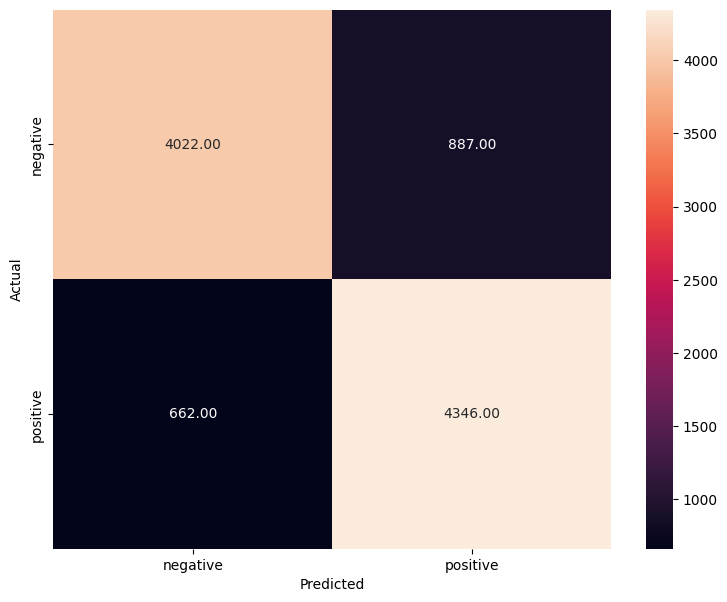

In [71]:
# assees model performance
score_metrics(y_test_word2vec, y_pred_word2vec)

- The evaluation metrics showed better performance when compared with BOW and TF-IDF. The 0 class here has metrics of precision = 0.85, recall = 0.82 and f1-score = 0.84 while the 1s class has precision = 0.83, recall = 0.86 and f1-score = 0.85.
- The result from Word2Vec seems better than the other 2

### Build with Continuous Bag of words (CBOW)


In [72]:
# create an instance of word2vec with CBOW
model_word2vec_cbow = Word2Vec(list_word, sg = 0)

In [73]:
feature_array_cbow = word_vectorizer(model = model_word2vec_cbow , corpus = list_word )

In [74]:
pd.DataFrame(feature_array_cbow)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.019961,-0.087720,-0.073013,-0.062411,0.218794,-0.110748,0.180942,0.380939,0.237952,-0.094972,...,0.301938,-0.178814,-0.146929,-0.017799,0.054533,-0.108537,0.424882,-0.008538,-0.222592,-0.044840
1,0.128258,0.411354,-0.003010,0.334364,0.427024,-0.048945,0.250770,0.180067,-0.331922,-0.052189,...,0.056266,0.293689,-0.391709,-0.025720,0.053240,-0.202152,-0.131298,0.286683,-0.090354,0.284281
2,0.217045,0.000185,-0.099053,0.119278,0.210819,0.003999,0.027202,0.460846,0.131878,0.098170,...,0.356334,0.125008,-0.290734,-0.084833,0.250074,-0.275927,0.015557,0.209493,-0.455371,-0.360632
3,0.118687,0.005313,-0.080604,-0.162677,0.141482,0.201370,0.267561,0.233018,0.531999,0.102033,...,0.230308,0.113420,-0.146508,-0.444039,0.220121,-0.363385,0.167906,0.164850,-0.193296,0.136041
4,-0.020939,0.004972,-0.029151,0.469325,0.309449,0.203662,-0.065335,0.278107,0.016152,0.083988,...,0.217770,-0.117382,-0.402576,-0.114336,0.034030,-0.194180,0.069743,-0.001448,-0.011019,-0.126704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49577,0.187305,0.252881,0.207239,0.532579,0.285407,0.488753,-0.165947,0.355495,0.266209,-0.048147,...,0.515026,-0.081509,-0.298755,-0.117219,0.117802,-0.625137,-0.334647,0.380765,-0.926642,-0.287936
49578,0.298047,0.258567,0.295755,0.391959,-0.258653,0.088188,0.106874,0.114871,0.182639,-0.131446,...,0.388693,0.205021,-0.157475,0.009211,0.014882,-0.410284,-0.113010,0.204717,-0.396526,-0.086736
49579,-0.041238,-0.267823,-0.008211,-0.225460,0.016856,0.143760,0.028611,0.635329,0.148849,-0.033491,...,0.351519,0.073453,-0.296506,-0.486401,0.242306,0.032433,0.178394,-0.112894,0.036770,-0.236044
49580,0.070340,0.092388,0.118194,0.177007,0.200054,-0.067941,0.055814,0.283363,0.062240,0.188400,...,0.263355,-0.004266,-0.130223,0.173605,0.355222,0.025654,0.117303,0.015923,-0.034049,-0.090656


In [75]:
# feature selection
x_word2vec_cbow = feature_array_cbow
y_word2vec_cbow = sent_review['sentiment']

In [76]:
# split my data into training and testing

x_train_cbow, X_text_cbow, y_train_cbow, y_test_cbow = train_test_split(x_word2vec_cbow, y_word2vec_cbow, test_size = 0.2, random_state = 0)

In [77]:
#create an instance of random forest for cbow

cbow_rf = RandomForestClassifier(random_state = 0)

#train the model

cbow_rf.fit(x_train_cbow, y_train_cbow,)

RandomForestClassifier(random_state=0)

In [78]:
#make prediction on the test
y_pred_cbow = cbow_rf.predict(X_text_cbow)

              precision    recall  f1-score   support

           0       0.84      0.81      0.82      4909
           1       0.82      0.85      0.83      5008

    accuracy                           0.83      9917
   macro avg       0.83      0.83      0.83      9917
weighted avg       0.83      0.83      0.83      9917



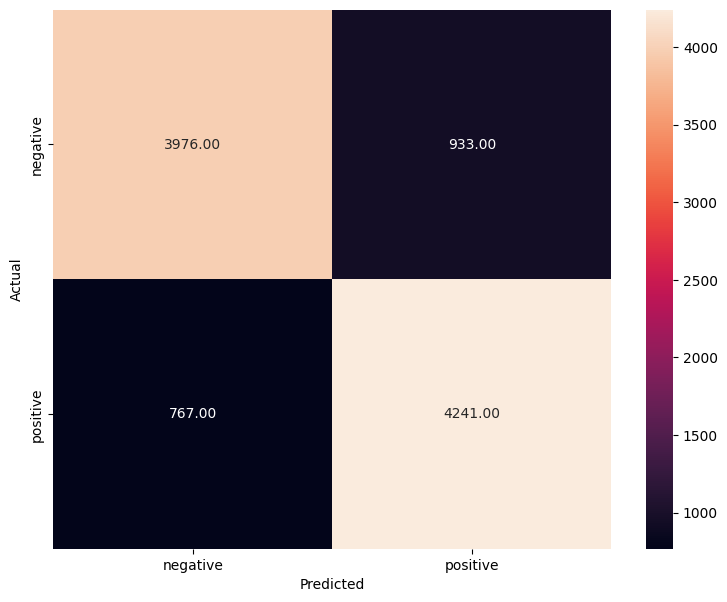

In [79]:
#evaluation metrics

score_metrics(y_test_cbow, y_pred_cbow)

- The performance is almost the same thing with that of Skip gram. The evaluation metrics for the 0 class are precision = 0.84, recall = 0.81, f1-score = 0.82
- The 1s class has the following scores, precision = 0.82, recall = 0.85 and f1-score = 0.83
- However, the result from the skipgram is better than that of CBOW

### Applying RNN ALGORITHM

In [80]:
#import required packages
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN, LSTM, Bidirectional
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer


In [81]:
#using the same cleaned dataset sent_review

sent_review

,review,sentiment
0,one reviewer mentioned watching oz episode hoo...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically family little boy jake think zombie ...,0
4,petter mattei s love time money visuall...,1
...,...,...
49577,thought movie right good job creative original...,1
49578,bad plot bad dialogue bad acting idiotic direc...,0
49579,catholic taught parochial elementary school nu...,0
49580,going disagree previous comment side maltin on...,0


### Tokenize and convert tokens into numerical vectors

In [82]:
tokenizer = Tokenizer(num_words=10000) 



In [83]:
#fit my tokenizer on texts
tokenizer.fit_on_texts(sent_review['review'].values)

In [95]:
# to extract the texts in sequence
x = tokenizer.texts_to_sequences(sent_review['review'].values)

In [97]:
import pickle

with open(r"C:\Users\User\Desktop\APPLY-AI\Datasets\Sentiment_analysis\tokenization_lstm_applied_ai.pk1", 'wb') as handle:

    pickle.dump(tokenizer, handle)


In [86]:
#print out the lenght of row 500 for just sanity checks
len(x[500])

91

In [91]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [92]:
# code that tokenize and count the lenght

def sentencecount(row):
    tokens = word_tokenize(row)
    lenght = len(tokens)
    return lenght

In [93]:
 sent_review['sentence_count'] = sent_review['review'].apply(lambda x: sentencecount(x))

In [94]:
sent_review['sentence_count'].describe()

count    49582.000000
mean       121.552519
std         92.230017
min          3.000000
25%         64.000000
50%         90.000000
75%        148.000000
max       1442.000000
Name: sentence_count, dtype: float64

#### Specify the maximum pad lenght to truncate

- This is where trade off comes in. 
- I am looking at using the 75% statiscis of 148.000. But I will try different numbers between 148,150,200, 300, 400 and 500 to pick out the once that will give me a better trade of as I will like to minimize the number of words to be filled with zeros and the once to be truncated

In [98]:
sent_review[sent_review['sentence_count'] < 150].count()

review            37382
sentiment         37382
sentence_count    37382
dtype: int64

In [99]:
sent_review[sent_review['sentence_count'] > 150].count()

review            12075
sentiment         12075
sentence_count    12075
dtype: int64

- Having gone through various numbers like 148,150,300,200,400, and 500. 150 looks to be a better trade off. 
- It is also close to the 75% counts on my dataframe which is 148.000
- I will go with 150

In [100]:
x = pad_sequences(x, maxlen = 150)

In [101]:
x

array([[ 174, 2973,  103, ...,  781, 3751,  327],
       [   0,    0,    0, ..., 1816,   16,  124],
       [   0,    0,    0, ...,   32,   14,  111],
       ...,
       [   0,    0,    0, ..., 3557,    3, 5434],
       [   0,    0,    0, ..., 1903, 2388,  620],
       [   0,    0,    0, ...,  904,  671,    1]])

The zeros are the paddings done by this model

In [102]:
#get the label
y= sent_review['sentiment']

In [103]:
#split the data
x_train, x_test, y_train,  y_test = train_test_split(x,y, test_size = 0.2, random_state=0)

In [104]:
#convert the y_train_rnn and y_test_rnn to categorical
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [105]:
#sanity check on y_train_rnn_cat
y_train_cat

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

### Build The RNN Model

In [106]:
#Build the RNN Architecture
model_rnn = Sequential()
model_rnn.add(Embedding(10000, 150, input_length=x.shape[1]))
model_rnn.add(SimpleRNN(100))
model_rnn.add(Dense(2, activation = 'sigmoid'))


In [107]:
#compile the mode
model_rnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 150)          1500000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 100)               25100     
                                                                 
 dense (Dense)               (None, 2)                 202       
                                                                 
Total params: 1,525,302
Trainable params: 1,525,302
Non-trainable params: 0
_________________________________________________________________


In [108]:
#import libries for Early stopping and modelcheckpoints
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [109]:
import os

# Specify the directory
save_directory = r"C:\Users\User\Desktop\APPLY-AI\Datasets\Sentiment_analysis\RNN_Models"

# Specify the filename for your model
model_filename = "rnn_model.h5"

# Create the absolute file path using os.path.join
path = os.path.join(save_directory, model_filename)


#path = "Sentiment_analysis\RNN_Models\rnn.hdf5"
es_rnn = EarlyStopping(patience = 3, verbose = 1)
chkpt = ModelCheckpoint(path, verbose = 1, save_best_only=True)

In [110]:
# train the model

history_rnn = model_rnn.fit(x_train,y_train_cat, batch_size = 32, epochs = 10, validation_split=0.2, callbacks=[es_rnn, chkpt])

Epoch 1/10
992/992 [==============================] - ETA: 0s - loss: 0.5106 - accuracy: 0.7406
Epoch 1: val_loss improved from inf to 0.44365, saving model to C:\Users\User\Desktop\APPLY-AI\Datasets\Sentiment_analysis\RNN_Models\rnn_model.h5
992/992 [==============================] - 84s 82ms/step - loss: 0.5106 - accuracy: 0.7406 - val_loss: 0.4436 - val_accuracy: 0.7976
Epoch 2/10
992/992 [==============================] - ETA: 0s - loss: 0.3642 - accuracy: 0.8456
Epoch 2: val_loss improved from 0.44365 to 0.36236, saving model to C:\Users\User\Desktop\APPLY-AI\Datasets\Sentiment_analysis\RNN_Models\rnn_model.h5
992/992 [==============================] - 85s 85ms/step - loss: 0.3642 - accuracy: 0.8456 - val_loss: 0.3624 - val_accuracy: 0.8458
Epoch 3/10
992/992 [==============================] - ETA: 0s - loss: 0.3442 - accuracy: 0.8562
Epoch 3: val_loss did not improve from 0.36236
992/992 [==============================] - 93s 94ms/step - loss: 0.3442 - accuracy: 0.8562 - val_loss

The model's performance produced a range of outcomes. The model showed promise in the early epochs, especially epoch 1, with a validation loss of 0.4071 and validation accuracy of 0.7944. This shows that the model was initially picking up on the underlying trends. However, throughout succeeding epochs, the validation loss rose, and accuracy declined, indicating overfitting or convergence to unfavorable outcomes. Because the validation measures didn't improve during epoch 4, it was decided to use early stopping, which shows that the model's performance peaked and perhaps wasn't at its best. This is the base model for Deep learning methodology.

### Build LSTM Model

- Note that LSTM is more heavy than the RNN

In [111]:
from keras.layers import Dropout
#Build the LSTM Architecture
model_lstm = Sequential()
model_lstm.add(Embedding(10000, 150, input_length=x.shape[1]))
model_lstm.add(SpatialDropout1D(0.3))
model_lstm.add(LSTM(100))
model_lstm.add(Dropout(0.6)) # 60% dropout
model_lstm.add(Dense(2, activation = 'sigmoid'))

In [112]:
#compile the mode
model_lstm.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 150, 150)          1500000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 150, 150)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               100400    
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 202       
                                                                 
Total params: 1,600,602
Trainable params: 1,600,602
Non-trainable params: 0
____________________________________________

In [115]:
import os

# Specify the directory
save_directory_lstm = r'C:\Users\User\Desktop\APPLY-AI\Datasets\Sentiment_analysis\LSTM_Models'

# Specify the filename for your model
model_filename_lstm = "lstm_model.h5"

# Create the absolute file path using os.path.join
path_lstm = os.path.join(save_directory_lstm, model_filename_lstm)


#path_lstm = "Sentiment_analysis\LSTM_Models\lstm.hdf5"
es_lstm = EarlyStopping(patience = 3, verbose = 1)
chkpt_lstm = ModelCheckpoint(path_lstm, verbose = 1, save_best_only=True)

In [116]:
# train the model

history_lstm = model_lstm.fit(x_train,y_train_cat, batch_size = 32, epochs = 10, validation_split=0.2, callbacks=[es_lstm, chkpt_lstm])

Epoch 1/10
992/992 [==============================] - ETA: 0s - loss: 0.1087 - accuracy: 0.9627
Epoch 1: val_loss improved from inf to 0.43198, saving model to C:\Users\User\Desktop\APPLY-AI\Datasets\Sentiment_analysis\LSTM_Models\lstm_model.h5
992/992 [==============================] - 216s 217ms/step - loss: 0.1087 - accuracy: 0.9627 - val_loss: 0.4320 - val_accuracy: 0.8654
Epoch 2/10
992/992 [==============================] - ETA: 0s - loss: 0.0882 - accuracy: 0.9708
Epoch 2: val_loss did not improve from 0.43198
992/992 [==============================] - 205s 207ms/step - loss: 0.0882 - accuracy: 0.9708 - val_loss: 0.4675 - val_accuracy: 0.8506
Epoch 3/10
992/992 [==============================] - ETA: 0s - loss: 0.0829 - accuracy: 0.9718
Epoch 3: val_loss did not improve from 0.43198
992/992 [==============================] - 178s 179ms/step - loss: 0.0829 - accuracy: 0.9718 - val_loss: 0.4843 - val_accuracy: 0.8686
Epoch 4/10
992/992 [==============================] - ETA: 0s - 

The model shows signs of overfitting early in training. Training loss and accuracy improve from 0.3714 loss and 84.04% accuracy at epoch 1 to 0.1073 loss and 96.29% accuracy by epoch 5. However, validation loss stops decreasing after epoch 2 where it reaches 0.28809. Validation accuracy peaks at 87.95% in epoch 2 then declines slightly. The growing gap between training and validation performance indicates the model is overfitting after the initial gains, triggering early stopping at epoch 5.

### Model Improvement

In [ ]:
from keras.layers import Embedding, SpatialDropout1D, LSTM, Dropout, Dense, BatchNormalization
from keras.models import Sequential
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import ReduceLROnPlateau

# Define the model architecture
model_lstm = Sequential()
model_lstm.add(Embedding(10000, 150, input_length=x.shape[1]))
model_lstm.add(SpatialDropout1D(0.3))
model_lstm.add(LSTM(100, return_sequences=True))  # Bidirectional LSTM
model_lstm.add(Dropout(0.5))  # Gradually increase dropout rate
model_lstm.add(LSTM(100))
model_lstm.add(Dropout(0.6))
model_lstm.add(Dense(2, activation='sigmoid', kernel_regularizer=l2(0.01)))  # L2 regularization
model_lstm.add(BatchNormalization())  # Batch normalization

# Compile the model
optimizer = Adam(lr=0.001)
model_lstm.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Add learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.5, min_lr=1e-6)
callbacks = [lr_scheduler]

# Train the model
history = model_lstm.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2, callbacks=callbacks)


Over ten epochs, the model's training accuracy fluctuated around 50%. Despite this, the validation accuracy remained consistently around 50.8%, suggesting that the model struggled to learn meaningful patterns from the data. The learning rate was gradually decreased, indicating an attempt to fine-tune training. However, the accuracy didn't significantly improve, remaining at a level consistent with random guessing. The model's performance was suboptimal, indicating a need for further analysis and adjustments in terms of model architecture, data preprocessing, or hyperparameter tuning.

#### Deep Learning Comparison of RNN, LSTM and LSTM Model Improvement

The LSTM model performed better with lower loss of 0.2359 and higher accuracy of 91.11% on the training data compared to the RNN's 0.352 loss and 85.02% accuracy. The LSTM also generalized better with lower validation loss of 0.2881 and higher validation accuracy of 87.95% versus the RNN's 0.5002 validation loss and 79.93% accuracy. Overall, the LSTM model clearly outperformed the RNN, likely due to its ability to capture longer term dependencies. With a validation accuracy of only 50.80%, the LSTM Model Improvement Model (3) performed poorly, showing that its predictions were not significantly more accurate than guessing at random.
